## How to work with matplotlib
[Matplotlib Tutorial](http://www.scipy-lectures.org/intro/matplotlib/matplotlib.html)

[Matplotlib](http://matplotlib.org/) is probably the single most used Python package for 2D-graphics. It provides both a very quick way to visualize data from Python and publication-quality figures in many formats. We are going to explore matplotlib in interactive mode covering most common cases.

In the Jupyter notebook, we insert, at the beginning of the notebook the following [magic](http://ipython.readthedocs.io/en/stable/interactive/magics.html):

`%matplotlib inline`

### pyplot

pyplot provides a procedural interface to the matplotlib object-oriented plotting library. It is modeled closely after Matlab™. Therefore, the majority of plotting commands in pyplot have Matlab™ analogs with similar arguments. Important commands are explained with interactive examples.  
`from matplotlib import pyplot as plt`

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

## Simple plot

### Plotting with default settings

In this section, we want to draw the cosine and sine functions on the same plot. Starting from the default settings, we’ll enrich the figure step by step to make it nicer.

First step is to get the data for the sine and cosine functions:

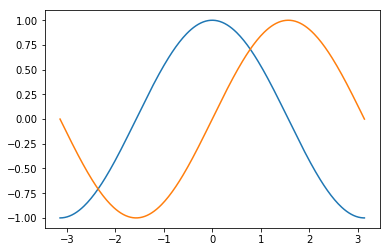

In [2]:
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

plt.plot(X, C)
plt.plot(X, S)

plt.show()

### Instantiating defaults

In the script below, we’ve instantiated (and commented) all the figure settings that influence the appearance of the plot.

The settings have been explicitly set to their default values, but now you can interactively play with the values to explore their affect (see Line properties and Line styles below). 

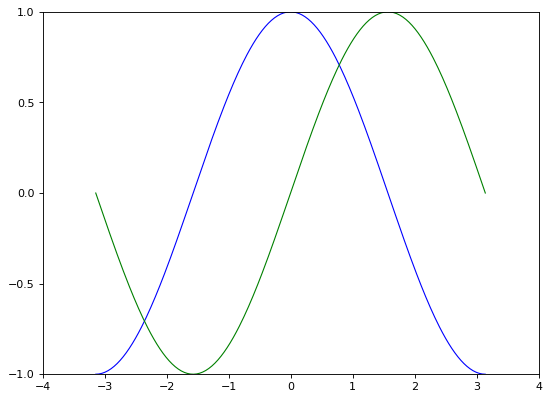

In [3]:
# Create a figure of size 8x6 inches, 80 dots per inch
plt.figure(figsize=(8, 6), dpi=80)

# Create a new subplot from a grid of 1x1
plt.subplot(1, 1, 1)

X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

# Plot cosine with a blue continuous line of width 1 (pixels)
plt.plot(X, C, color="blue", linewidth=1.0, linestyle="-")

# Plot sine with a green continuous line of width 1 (pixels)
plt.plot(X, S, color="green", linewidth=1.0, linestyle="-")

# Set x limits
plt.xlim(-4.0, 4.0)

# Set x ticks
plt.xticks(np.linspace(-4, 4, 9, endpoint=True))

# Set y limits
plt.ylim(-1.0, 1.0)

# Set y ticks
plt.yticks(np.linspace(-1, 1, 5, endpoint=True))

# Save figure using 72 dots per inch
# plt.savefig("exercice_2.png", dpi=72)

# Show result on screen
plt.show()

### Changing colors and line widths

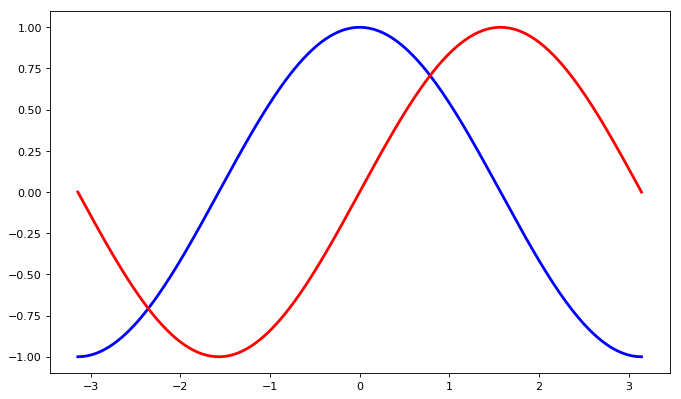

In [4]:
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red", linewidth=2.5, linestyle="-")
plt.show()

### Setting limits

Current limits of the figure are a bit too tight and we want to make some space in order to clearly see all data points.

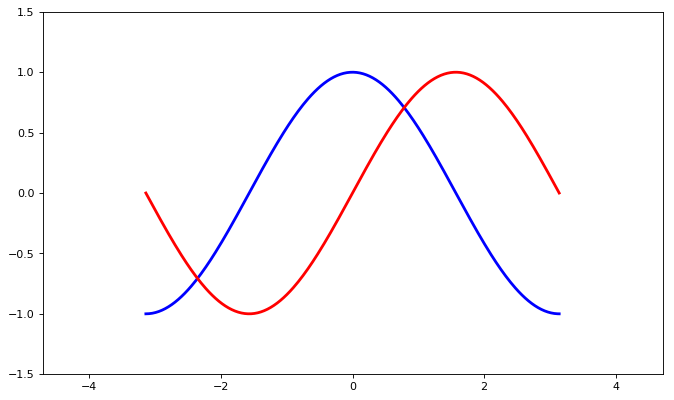

In [5]:
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red", linewidth=2.5, linestyle="-")
plt.xlim(X.min() * 1.5, X.max() * 1.5)
plt.ylim(C.min() * 1.5, C.max() * 1.5)
plt.show()

### Setting ticks

Current ticks are not ideal because they do not show the interesting values (+/-π,+/-π/2) for sine and cosine. We’ll change them such that they show only these values.

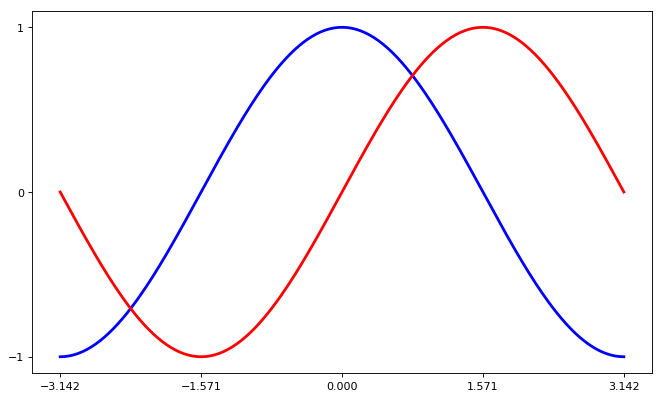

In [6]:
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red", linewidth=2.5, linestyle="-")
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
plt.yticks([-1, 0, +1])
plt.show()

### Setting tick labels

Ticks are now properly placed but their label is not very explicit. We could guess that 3.142 is π but it would be better to make it explicit. When we set tick values, we can also provide a corresponding label in the second argument list. Note that we’ll use latex to allow for nice rendering of the label.

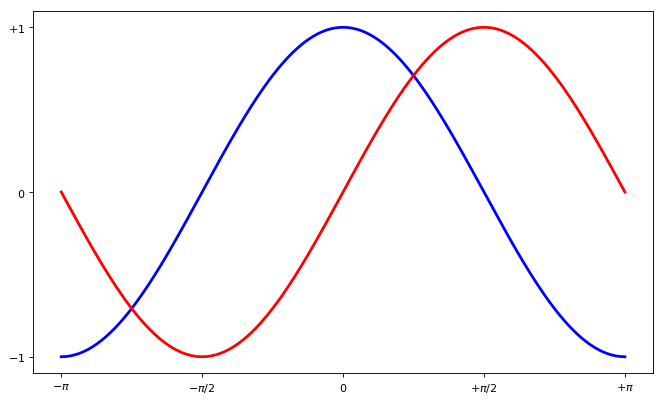

In [7]:
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red", linewidth=2.5, linestyle="-")
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
          [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
plt.yticks([-1, 0, +1],
          [r'$-1$', r'$0$', r'$+1$'])
plt.show()

### Moving spines

Spines are the lines connecting the axis tick marks and noting the boundaries of the data area. They can be placed at arbitrary positions and until now, they were on the border of the axis. We’ll change that since we want to have them in the middle. Since there are four of them (top/bottom/left/right), we’ll discard the top and right by setting their color to none and we’ll move the bottom and left ones to coordinate 0 in data space coordinates.

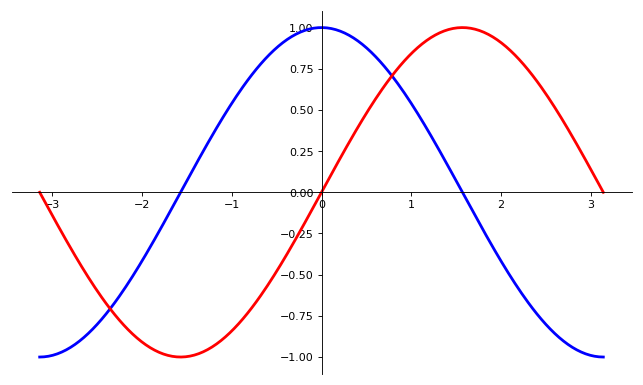

In [8]:
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red", linewidth=2.5, linestyle="-")

ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

plt.show()

### Adding a legend

Let’s add a legend in the upper left corner. This only requires adding the keyword argument label (that will be used in the legend box) to the plot commands.

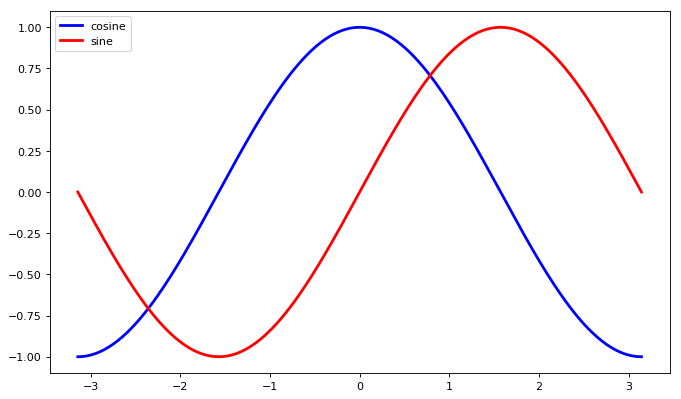

In [9]:
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosine")
plt.plot(X, S, color="red", linewidth=2.5, linestyle="-", label="sine")

plt.legend(loc='upper left')

plt.show()

### Annotate some points

Let’s annotate some interesting points using the annotate command. We chose the 2π/3 value and we want to annotate both the sine and the cosine. We’ll first draw a marker on the curve as well as a straight dotted line. Then, we’ll use the annotate command to display some text with an arrow.

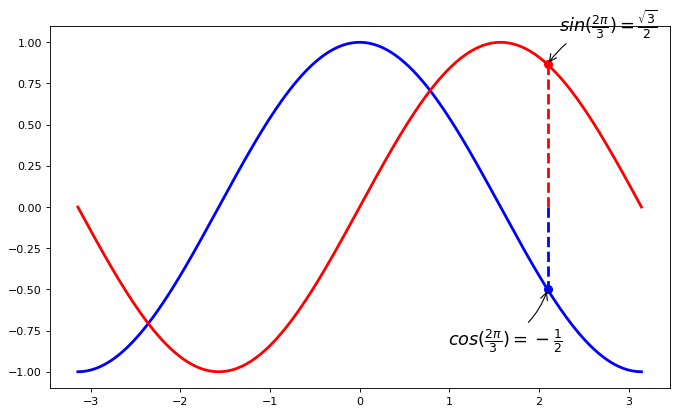

In [10]:
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosine")
plt.plot(X, S, color="red", linewidth=2.5, linestyle="-", label="sine")

t = 2 * np.pi / 3
plt.plot([t, t], [0, np.cos(t)], color='blue', linewidth=2.5, linestyle="--")
plt.scatter([t, ], [np.cos(t), ], 50, color='blue')

plt.annotate(r'$sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
             xy=(t, np.sin(t)), xycoords='data',
             xytext=(+10, +30), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.plot([t, t],[0, np.sin(t)], color='red', linewidth=2.5, linestyle="--")
plt.scatter([t, ],[np.sin(t), ], 50, color='red')

plt.annotate(r'$cos(\frac{2\pi}{3})=-\frac{1}{2}$',
             xy=(t, np.cos(t)), xycoords='data',
             xytext=(-90, -50), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.show()

## Other Types of Plots

### Regular Plots

Starting from the code below, try to reproduce the graphic on the right taking care of filled areas:

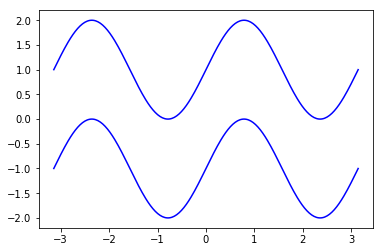

In [11]:
n = 256
X = np.linspace(-np.pi, np.pi, n, endpoint=True)
Y = np.sin(2 * X)

plt.plot(X, Y + 1, color='blue', alpha=1.00)
plt.plot(X, Y - 1, color='blue', alpha=1.00)

### Scatter Plots

Starting from the code below, try to reproduce the graphic on the right taking care of marker size, color and transparency.

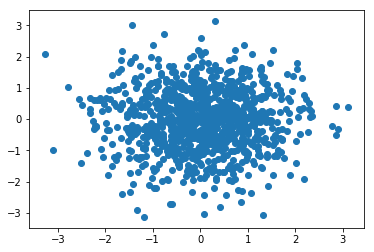

In [12]:
n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)

plt.scatter(X,Y)

### Bar Plots

Starting from the code below, try to reproduce the graphic on the right by adding labels for red bars.

(-1.25, 1.25)

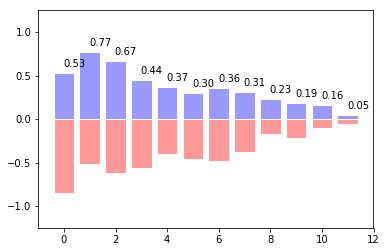

In [13]:
n = 12
X = np.arange(n)
Y1 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)
Y2 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)

plt.bar(X, +Y1, facecolor='#9999ff', edgecolor='white')
plt.bar(X, -Y2, facecolor='#ff9999', edgecolor='white')

for x, y in zip(X, Y1):
    plt.text(x + 0.4, y + 0.05, '%.2f' % y, ha='center', va='bottom')

plt.ylim(-1.25, +1.25)

### Contour Plots

Starting from the code below, try to reproduce the graphic on the right taking care of the colormap (see [Colormaps](http://www.scipy-lectures.org/intro/matplotlib/matplotlib.html#colormaps) below).

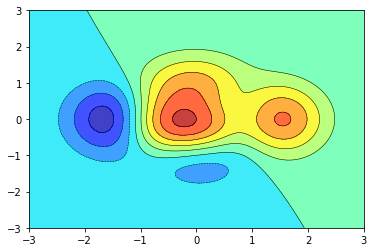

In [14]:
def f(x, y):
    return (1 - x / 2 + x ** 5 + y ** 3) * np.exp(-x ** 2 -y ** 2)

n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X, Y = np.meshgrid(x, y)

plt.contourf(X, Y, f(X, Y), 8, alpha=.75, cmap='jet')
C = plt.contour(X, Y, f(X, Y), 8, colors='black', linewidths=.5)

### Imshow

Starting from the code below, try to reproduce the graphic on the right taking care of colormap, image interpolation and origin.

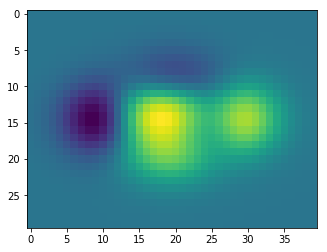

In [15]:
def f(x, y):
    return (1 - x / 2 + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)

n = 10
x = np.linspace(-3, 3, 4 * n)
y = np.linspace(-3, 3, 3 * n)
X, Y = np.meshgrid(x, y)
plt.imshow(f(X, Y))

### Pie Charts

Starting from the code below, try to reproduce the graphic on the right taking care of colors and slices size.

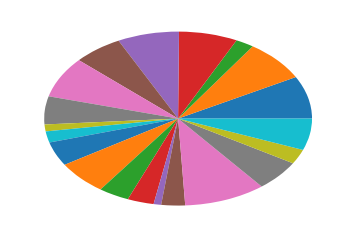

In [16]:
Z = np.random.uniform(0, 1, 20)
plt.pie(Z)
plt.show()

### Quiver Plots

Starting from the code above, try to reproduce the graphic on the right taking care of colors and orientations.

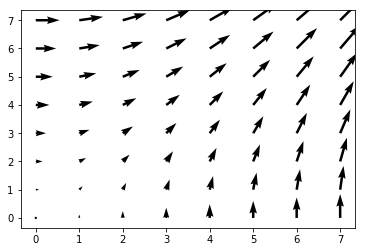

In [17]:
n = 8
X, Y = np.mgrid[0:n, 0:n]
plt.quiver(X, Y)

### 3D Plots

Starting from the code below, try to reproduce the graphic on the right.

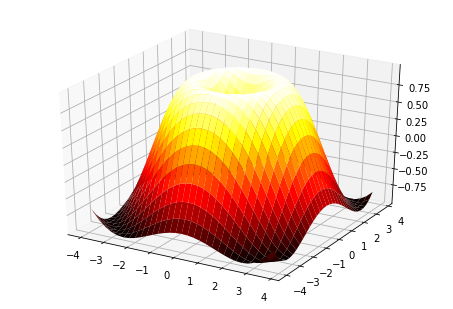

In [18]:
fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='hot')

## Quick references

### Line properties

![Line properties](../images/matplotlib-line-properties.png "Line properties")

### Line styles

![Line styles](../images/matplotlib-line-style.png "Line styles")

### Line markers

![Line markers](../images/matplotlib-line-markers.png "Line markers")